In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [2]:
!pip install langdetect

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 981 kB 7.8 MB/s 
  Created wheel for langdetect: filename=langdetect-1.0.9-py3-none-any.whl size=993242 sha256=1ee3a1b288a32fd2811ff460e7669f9ca1f7c4af5ca3cb16421830592234481a
  Stored in directory: /root/.cache/pip/wheels/c5/96/8a/f90c59ed25d75e50a8c10a1b1c2d4c402e4dacfa87f3aff36a
Successfully built langdetect


In [3]:
!pip install googletrans==3.1.0a0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 55 kB 2.7 MB/s 
     |████████████████████████████████| 1.3 MB 18.2 MB/s 
     |████████████████████████████████| 42 kB 1.4 MB/s 
     |████████████████████████████████| 53 kB 2.3 MB/s 
     |████████████████████████████████| 65 kB 3.4 MB/s 
  Created wheel for googletrans: filename=googletrans-3.1.0a0-py3-none-any.whl size=16367 sha256=c608f1260f51421b40a696ac3889b84af23b5275b86b0feac1d210aaec0e4e00
  Stored in directory: /root/.cache/pip/wheels/0c/be/fe/93a6a40ffe386e16089e44dad9018ebab9dc4cb9eb7eab65ae
Successfully built googletrans


In [4]:
import pandas as pd 
from langdetect import detect 
from googletrans import Translator 
from nltk.tokenize import word_tokenize 
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import matplotlib.pyplot as plt 
from string import punctuation 
import seaborn as sns 
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer

In [5]:
df = pd.read_csv(r"/content/drive/MyDrive/dataset_es_train.csv")
df.head(2)

,review_id,product_id,reviewer_id,stars,review_body,review_title,language,product_category
0,es_0491108,product_es_0296024,reviewer_es_0999081,1,Nada bueno se me fue ka pantalla en menos de 8...,television Nevir,es,electronics
1,es_0869872,product_es_0922286,reviewer_es_0216771,1,"Horrible, nos tuvimos que comprar otro porque ...",Dinero tirado a la basura con esta compra,es,electronics


In [6]:
# language detection 

def lang_detect(data):
  lang = detect(data)
  return lang 

lang_detect(df.review_body[1])

'es'

In [7]:
# language translation 
def lang_trans(data):
  translator = Translator()
  trans = translator.translate(data,dest='en')
  return trans.text

lang_trans(df.review_body[1])

'Horrible, we had to buy another one because neither we who know English, nor a computer technician, after an hour was able to install it'

In [8]:
df.review_body[1]

'Horrible, nos tuvimos que comprar otro porque ni nosotros que sabemos inglés, ni un informático, después de una hora fue capaz de instalarlo'

In [9]:
df_test = df[:1000]

In [10]:
df_test

,review_id,product_id,reviewer_id,stars,review_body,review_title,language,product_category
0,es_0491108,product_es_0296024,reviewer_es_0999081,1,Nada bueno se me fue ka pantalla en menos de 8...,television Nevir,es,electronics
1,es_0869872,product_es_0922286,reviewer_es_0216771,1,"Horrible, nos tuvimos que comprar otro porque ...",Dinero tirado a la basura con esta compra,es,electronics
2,es_0811721,product_es_0474543,reviewer_es_0929213,1,Te obligan a comprar dos unidades y te llega s...,solo llega una unidad cuando te obligan a comp...,es,drugstore
3,es_0359921,product_es_0656090,reviewer_es_0224702,1,"No entro en descalificar al vendedor, solo pue...",PRODUCTO NO RECIBIDO.,es,wireless
4,es_0068940,product_es_0662544,reviewer_es_0224827,1,Llega tarde y co la talla equivocada,Devuelto,es,shoes
...,...,...,...,...,...,...,...,...
995,es_0517865,product_es_0307425,reviewer_es_0493382,1,A la segunda botella se ha roto y ha perdido t...,ALFONSO,es,home
996,es_0066690,product_es_0275407,reviewer_es_0715411,1,Por muy bien que lo ajustes el protector no se...,No lo compres.,es,wireless
997,es_0521669,product_es_0399557,reviewer_es_0570918,1,Muy mal. Entiendo que la pantalla curva del no...,Mala experiencia,es,wireless
998,es_0982784,product_es_0213137,reviewer_es_0502876,1,"Amazon me obliga a escribir 19 palabras, pero ...",Inútil,es,office_product


In [11]:
df_test['translated_review'] = df_test['review_body'].apply(lang_trans)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [12]:
df_test.drop(['review_id','product_id','reviewer_id','review_title','language','product_category'],axis=1,inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [13]:
df_test.drop('review_body',axis=1,inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


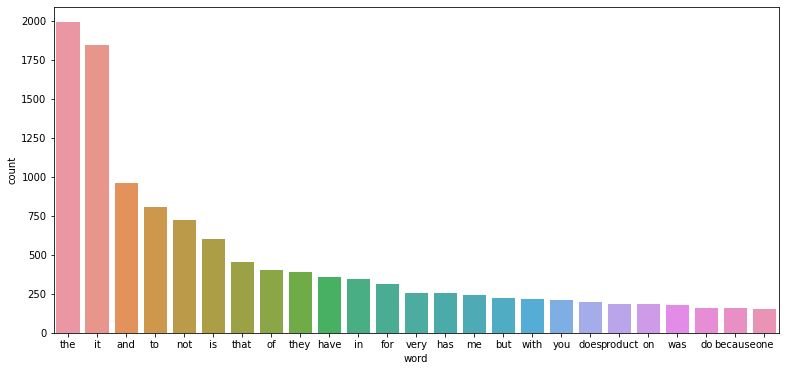

In [14]:
# EDA : Ngrams
                                                     
# unigrams Visualization                     

def get_ngrams(data,n=None):
  cv = CountVectorizer()
  vectors = cv.fit_transform(data)
  sum_of_words = vectors.sum(axis=0)
  word_freq =[ (word,sum_of_words[0,i]) for word,i in cv.vocabulary_.items()]   # vocabulart.item = words sum_of_words    able : 10
  word_freq = sorted(word_freq,key = lambda x : x[1],reverse= True)
  return word_freq[:n]

common_words = get_ngrams(df_test.translated_review,25)
df_ngrams = pd.DataFrame(common_words,columns=['word','count'])
fig,ax = plt.subplots(figsize=(13,6))
fig = sns.barplot(x='word',y='count',data=df_ngrams,ax=ax)
ax.set_xticklabels(labels = df_ngrams['word'])
plt.show()

In [28]:
import nltk
nltk.download('omw-1.4')
  

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Unzipping corpora/omw-1.4.zip.


True

In [19]:
stop = stopwords.words('english')
def clean_text(data):
  tokens = word_tokenize(data)
  text = [i.lower() for i in tokens if (i not in stop) and ( i not in punctuation) and ( i.isalpha())]
  string = " ".join(text)
  return string
df_test['clean_text'] = df_test['translated_review'].apply(clean_text)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [ ]:
df_test

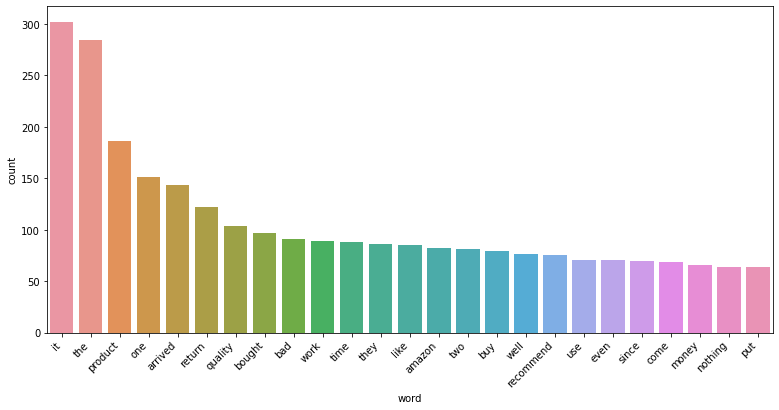

In [20]:
# EDA : Ngrams
                                                     
# unigrams Visualization                     

def get_ngrams(data,n=None):
  cv = CountVectorizer()
  vectors = cv.fit_transform(data)
  sum_of_words = vectors.sum(axis=0)
  word_freq =[ (word,sum_of_words[0,i]) for word,i in cv.vocabulary_.items()]   # vocabulart.item = words sum_of_words    able : 10
  word_freq = sorted(word_freq,key = lambda x : x[1],reverse= True)
  return word_freq[:n]

common_words = get_ngrams(df_test.clean_text,25)
df_ngrams = pd.DataFrame(common_words,columns=['word','count'])
fig,ax = plt.subplots(figsize=(13,6))
fig = sns.barplot(x='word',y='count',data=df_ngrams,ax=ax)
ax.set_xticklabels(labels = df_ngrams['word'],rotation=45,ha='right')
plt.show()

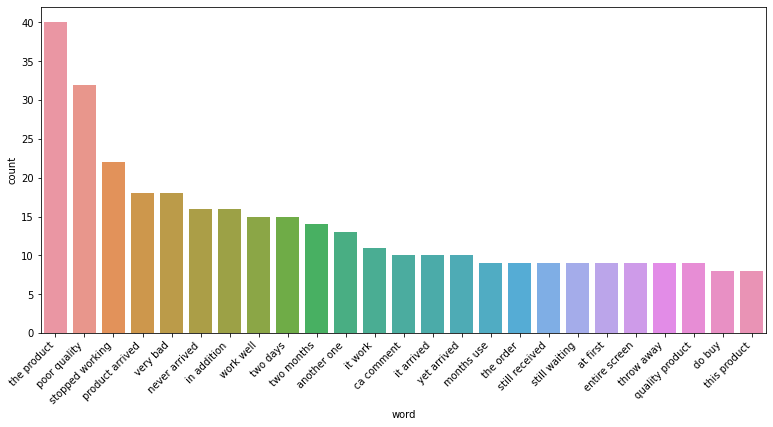

In [21]:
# bigrams 
def get_ngrams(data,n=None):
  cv = CountVectorizer(ngram_range=(2,2))
  vectors = cv.fit_transform(data)
  sum_of_words = vectors.sum(axis=0)
  word_freq =[ (word,sum_of_words[0,i]) for word,i in cv.vocabulary_.items()]   # vocabulart.item = words sum_of_words    able : 10
  word_freq = sorted(word_freq,key = lambda x : x[1],reverse= True)
  return word_freq[:n]

common_words = get_ngrams(df_test.clean_text,25)
df_ngrams = pd.DataFrame(common_words,columns=['word','count'])
fig,ax = plt.subplots(figsize=(13,6))
fig = sns.barplot(x='word',y='count',data=df_ngrams,ax=ax)
ax.set_xticklabels(labels = df_ngrams['word'],rotation=45,ha='right')
plt.show()

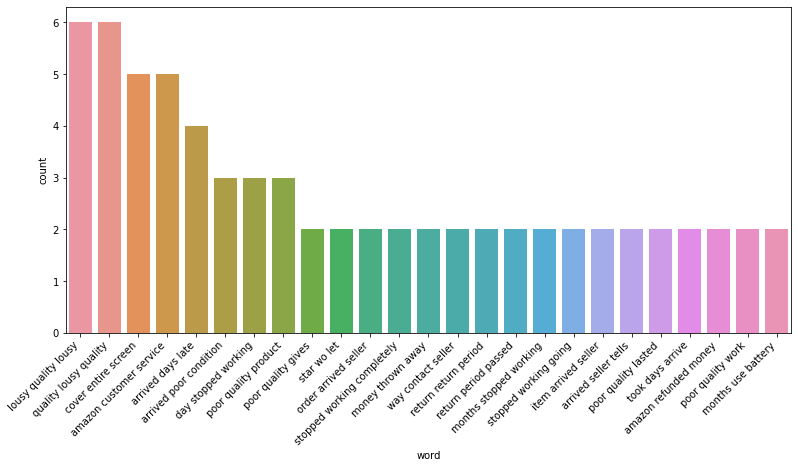

In [22]:
# triigrams 
def get_ngrams(data,n=None):
  cv = CountVectorizer(ngram_range=(3,3),stop_words='english')
  vectors = cv.fit_transform(data)
  sum_of_words = vectors.sum(axis=0)
  word_freq =[ (word,sum_of_words[0,i]) for word,i in cv.vocabulary_.items()]   # vocabulart.item = words sum_of_words    able : 10
  word_freq = sorted(word_freq,key = lambda x : x[1],reverse= True)
  return word_freq[:n]

common_words = get_ngrams(df_test.clean_text,25)
df_ngrams = pd.DataFrame(common_words,columns=['word','count'])
fig,ax = plt.subplots(figsize=(13,6))
fig = sns.barplot(x='word',y='count',data=df_ngrams,ax=ax)
ax.set_xticklabels(labels = df_ngrams['word'],rotation=45,ha='right')
plt.show()

In [26]:
# Preprocessing 

# 1. Tokenization 

def tokenization (data):
  tokens = word_tokenize(data)
  return tokens 

# 2. Cleaning 
def data_cleaning(data): 
  clean_data = [ i for i in data if (i not in punctuation) and (len(i)>=2)]
  return clean_data

# 3.Normalization 
def lower_case(data):
  lower_case = [i.lower() for i in data]
  return lower_case

# 4. Stopwords removal domain specific and english language 

def stopwords_removal(data):
  text = [ i for i in data if i not in stop]
  return text 

# 5. stemming or lemmatization 

def lemmatization(data):
  lemma = WordNetLemmatizer()
  text_list = [] 
  for i in data :
    text = lemma.lemmatize(i)
    text_list.append(text)
  return text_list


In [29]:
tokens = df_test.translated_review.apply(tokenization)
clean_text =tokens.apply(data_cleaning)
lower_text =clean_text.apply(lower_case)
without_stop_text =lower_text.apply(stopwords_removal)
text_lemma =without_stop_text.apply(lemmatization)


In [30]:
# target column 

def target_creation(data):
  if (data==1) or (data==2):
    return 'Not Satisfied'
  elif (data==3) :
    return "satisfied"
  elif (data==4) or (data==5):
    return 'Happy'

In [31]:
df_test['target']=df_test.stars.apply(target_creation)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [32]:
df_test

,stars,translated_review,clean_text,target
0,1,Nothing good the screen left me in less than 8...,nothing good screen left less months i receive...,Not Satisfied
1,1,"Horrible, we had to buy another one because ne...",horrible buy another one neither know english ...,Not Satisfied
2,1,They force you to buy two units and only one a...,they force buy two units one arrives way claim...,Not Satisfied
3,1,"I'm not going to disqualify the seller, I can ...",i going disqualify seller i say two months wai...,Not Satisfied
4,1,Arrives late and in the wrong size,arrives late wrong size,Not Satisfied
...,...,...,...,...
995,1,The second bottle has broken and has lost all ...,the second bottle broken lost liquid one side ...,Not Satisfied
996,1,"No matter how well you adjust it, the protecto...",no matter well adjust protector stick well edg...,Not Satisfied
997,1,Very bad. I understand that the note's curved ...,very bad i understand note curved screen diffi...,Not Satisfied
998,1,"Amazon forces me to write 19 words, but I thin...",amazon forces write words i think word best de...,Not Satisfied


In [33]:
#Clustering : KMEANS , Hierarchical , SOM 
vectorizer = TfidfVectorizer(stop_words='english')
x = vectorizer.fit_transform(df_test.clean_text.tolist())

In [35]:
from sklearn.cluster import KMeans

In [36]:
model = KMeans(n_clusters=3)
model.fit(x)
labels = model.labels_
Kmeans = pd.DataFrame(list(zip(df_test.clean_text,labels)),columns =['text','cluster'])
Kmeans.head(2)

,text,cluster
0,nothing good screen left less months i receive...,1
1,horrible buy another one neither know english ...,0


In [37]:
from wordcloud import WordCloud

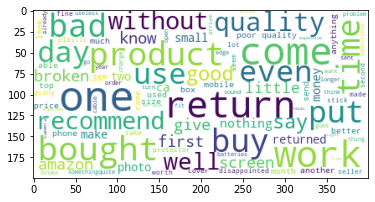

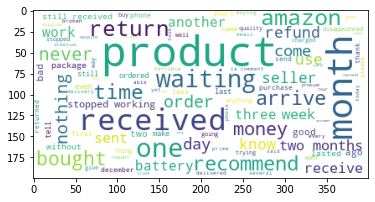

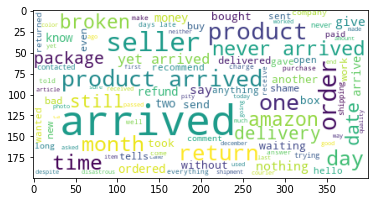

In [40]:
for i in range(0,3):
  s = Kmeans[Kmeans.cluster==i]
  text = s['text'].str.cat(sep=" ")
  text = " ".join([word for word in text.split()])
  wordcloud = WordCloud(max_font_size=50,max_words=100,background_color='white')
  wordcloud = wordcloud.generate(text)
  plt.figure()
  plt.imshow(wordcloud)
  plt.show()
  

In [42]:
df_test.drop(['stars','translated_review'],axis=1,inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [44]:
df_test

,clean_text,target
0,nothing good screen left less months i receive...,Not Satisfied
1,horrible buy another one neither know english ...,Not Satisfied
2,they force buy two units one arrives way claim...,Not Satisfied
3,i going disqualify seller i say two months wai...,Not Satisfied
4,arrives late wrong size,Not Satisfied
...,...,...
995,the second bottle broken lost liquid one side ...,Not Satisfied
996,no matter well adjust protector stick well edg...,Not Satisfied
997,very bad i understand note curved screen diffi...,Not Satisfied
998,amazon forces write words i think word best de...,Not Satisfied


In [43]:
# train test split 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline

In [45]:
x_train,x_text,y_train,y_test = train_test_split(df_test.clean_text,df_test.target,random_state=42)

In [46]:
label = LabelEncoder()
y_final_train = label.fit_transform(y_train)
y_test_final = label.transform(y_test)

In [47]:
clf_multinb_pipeline = Pipeline([('vect',CountVectorizer()),('clf_mnb',MultinomialNB())])
clf_multinb_pipeline.fit(x_train,y_final_train)

Pipeline(steps=[('vect', CountVectorizer()), ('clf_mnb', MultinomialNB())])

In [49]:
# PCA
# TSME 
predict_y = clf_multinb_pipeline.predict(x_text)

In [51]:
from sklearn.metrics import accuracy_score
acc = accuracy_score(y_test_final,predict_y)
acc

1.0

In [ ]:
# Logistic Regression
# Decision Tree Classifier 
# SVM 
# Adaboost 
# Naive bayes 
# Gb 
# XGB

# base model  ----> hyper parameter tunning , ---> final


In [ ]:
# Model Monitoring 
past  gb : 80 
new   gb : 60     data drift 

switching  past : gb,xgb,svm  80 79 75 
           new  : gb 79 xgb 75 svm 85



# data extraction to  modelling 
  